In [21]:
# import sys
# import itertools as it
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from IPython.display import display
# from collections import OrderedDict
import re
# import pandas.util.testing as tm
# import pdb
# from glob import glob
# import logging
# from scipy.stats import distributions, probplot

from probplots import ProbPlots

%matplotlib inline


pd.set_option('display.multi_sparse', True)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

SEED = 42

def disp_cb(cb):
    """Displays Dataframe with long descriptions.
    
    Used for codebooks.
    """
    with pd.option_context('display.max_rows', 100, 'max_colwidth', 1000):
        display(cb.style.set_properties(**{'text-align': 'left'}))
        
DATA_DIR    = '../Data/'
# SCRAPES_DIR = '../Scrapes'

# SCL_DIR  = ''.join([DATA_DIR, 'Schools/'])
REL_DIR  = ''.join([DATA_DIR, 'Religion/'])
# DEM_DIR  = ''.join([DATA_DIR, 'Demography/'])

# TS_DIR = '/Users/mdlynch37/projects/coding/learning-math-and-stats/ThinkStats2/code'
# sys.path.append(TS_DIR)
# import thinkstats2
# import thinkplot


##  Faith Communities Today Survey (FACT) 2010, Jewish

- Loads of fields:
    - Community engagement, like TUTORING
    - Social media
    - outreach to get new members (potentially a good sign)
    - lots more
    
Might be useful to make tutoring field target

In [8]:
FACT_DAT_FP = ''.join([REL_DIR, 'FACT-2010-Jewish.DTA'])
FACT_CB_FP  = ''.join([REL_DIR, 'FACT-2010-Jewish-CB.txt'])

In [9]:
def read_cb(fp):
    """
    Reads codebook .txt file for Faith Communities Today 2010
    Survey of Synagogues, Jewish.
    """
    with open(fp) as f:
        cb_txt = f.read()
    data = re.findall(r'\d+[)][ ]([^\n\r]+)\s+([^\n\r]+)', cb_txt)
    df = (pd.DataFrame(data, columns=['VAR', 'DESCRIPTION'])
          .set_index('VAR')
          )
    return df

def search_cb(s, cb):
    disp_cb(cb[
        cb.DESCRIPTION.str.contains(s, case=False)
        | cb.index.str.contains(s, case=False)]
    )


In [10]:
fact_cb = read_cb(FACT_CB_FP)
fact_cb.head()

,DESCRIPTION
VAR,
LIST,List
FRISERVE,Please describe the worship services your cong...
SATABSER,Please describe the worship services your cong...
SATANSER,Please describe the worship services your cong...
FRIATT,Please describe the worship services your cong...


In [25]:
def read_fact_jewish(fp):
    data = (pd.read_stata(fp)
            .rename(columns=lambda x: x.upper()))
    return data

GENERAL = ['WTRESP' ,'DENOM', 'DIVERSE', 'EVERYONE']

AGE_GROUPS = ['SENIORS', 'MIDDLEAG', 'MEDADULT', 'YADULTS', 'KIDYTH']
RACE_COLS = ['NATAMS', 'ASIANS', 'PACIFICI', 
             'BLACKS', 'HISPANIC', 'WHITE', 'MULTI']


COMPOSITE = ['Total_Staff']

EDU = ['SSCHOOL', 'TUTOR_N', 'TUTOR_Y1', 'TUTOR_Y2']

fact_df = read_fact_jewish(FACT_DAT_FP)
df = (fact_df.assign(Total_Staff=fact_df.loc[:, 'FULLORD':'PARTOTH']
                     .sum(axis=1))
)

COLS = GENERAL + EDU + COMPOSITE

if not all(col in df.columns for col in COLS):
    print(set(COLS) - set(df.columns))
    raise KeyError
    
cb = fact_cb.loc[COLS].fillna('')

In [26]:
cols = ['DENOM']
for col in cols:
    print(col)
    display(fact_df[col].value_counts(dropna=False))
#     display(fact_df[col].describe())

DENOM


Conservative    647
Reform          568
Name: DENOM, dtype: int64

In [27]:
df.TUTOR_Y1.value_counts(normalize=True)

Not selected        0.761
Provided directly   0.239
Name: TUTOR_Y1, dtype: float64

In [28]:
df.TUTOR_Y2.value_counts(normalize=True)

Not selected                  0.905
Together with another group   0.095
Name: TUTOR_Y2, dtype: float64

In [29]:
df.TUTOR_Y1.groupby(df.DENOM).value_counts(normalize=True)

DENOM         TUTOR_Y1         
Conservative  Not selected        0.723
              Provided directly   0.277
Reform        Not selected        0.805
              Provided directly   0.195
Name: TUTOR_Y1, dtype: float64

In [30]:
df.TUTOR_Y2.groupby(df.DENOM).value_counts(normalize=True)

DENOM         TUTOR_Y2                   
Conservative  Not selected                  0.926
              Together with another group   0.074
Reform        Not selected                  0.880
              Together with another group   0.120
Name: TUTOR_Y2, dtype: float64

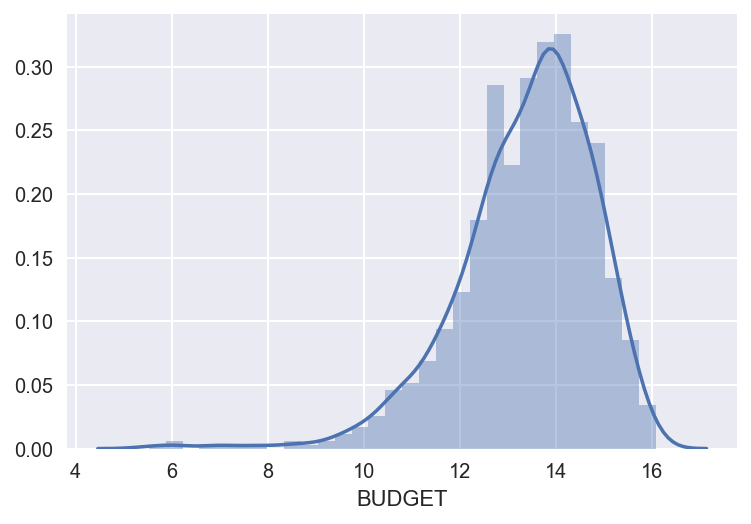

In [45]:
data = np.log(df.BUDGET.dropna())
sns.distplot(data)

<module 'matplotlib.pyplot' from '/Users/mdlynch37/anaconda3/envs/py3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

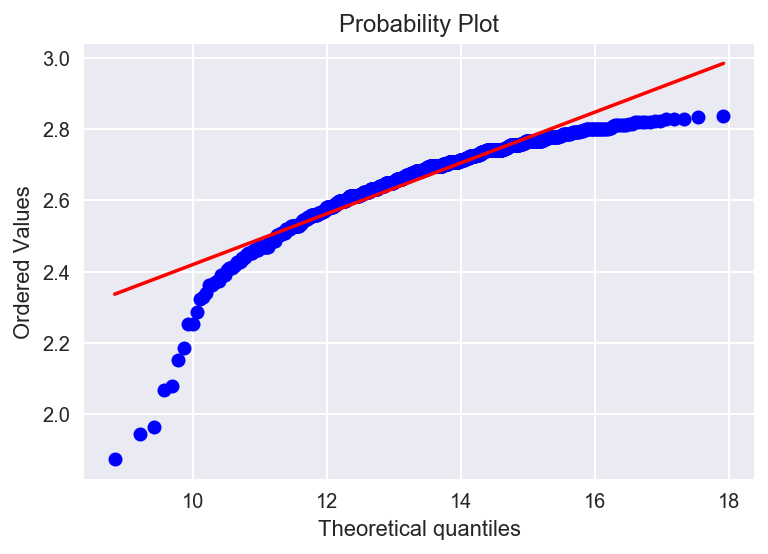

In [46]:
probplots = ProbPlots(data)
probplots.plot_probplot(dist_name='lognorm')

<module 'matplotlib.pyplot' from '/Users/mdlynch37/anaconda3/envs/py3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

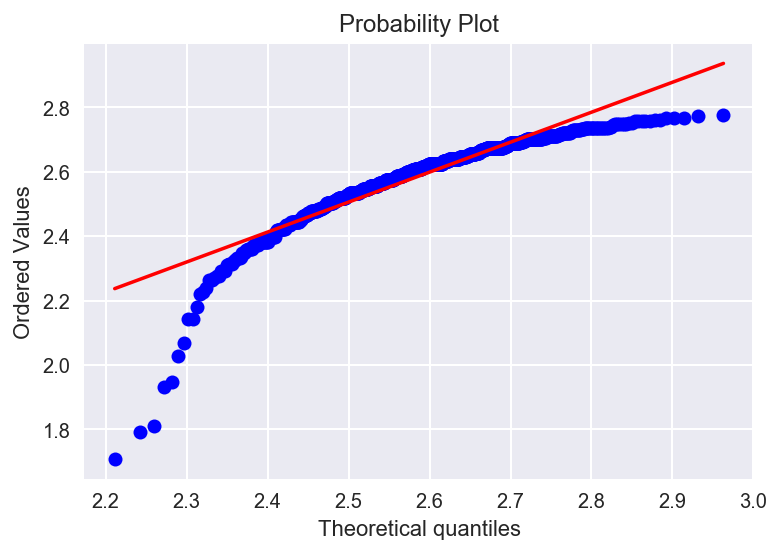

In [48]:
probplots = ProbPlots(np.log(data))
probplots.plot_probplot(dist_name='norm')

In [50]:
df.Total_Staff.describe()

count     1215.000
mean       107.340
std       2868.755
min          0.000
25%          6.000
50%         15.000
75%         31.000
max     100013.000
Name: Total_Staff, dtype: float64

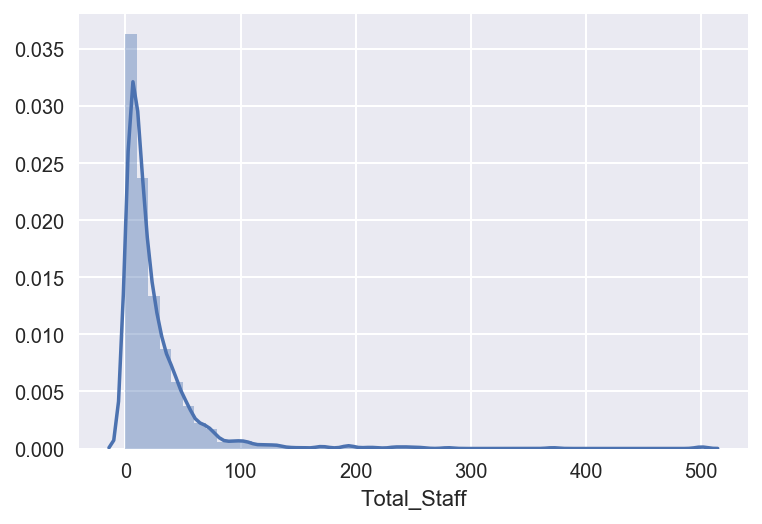

In [55]:
sns.distplot(df.Total_Staff.clip(upper=500))

<module 'matplotlib.pyplot' from '/Users/mdlynch37/anaconda3/envs/py3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

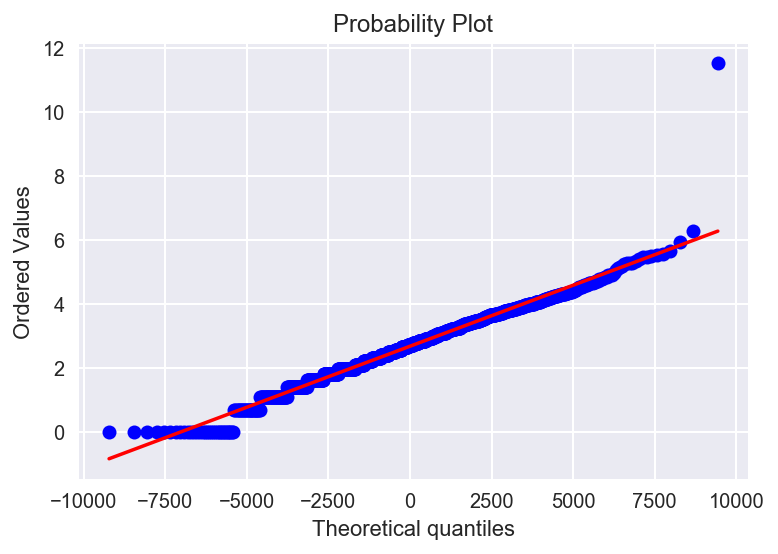

In [57]:
probplots = ProbPlots(df.Total_Staff)
probplots.plot_probplot(dist_name='lognorm')